## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [22]:
import os
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

def make_csv(query, filename):
   
    # check if file already exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        return df
    # ensure all columns are displayed when viewing a pandas dataframe
    pd.set_option('display.max_columns', None)
    
    # Creating a connection to the database
    print("creating conecction...")
    con = psycopg2.connect(database="mid_term_project", 
                           user="lhl_student", 
                           password="lhl_student", 
                           host="lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com", 
                           port="5432")


    # creating a cursor object
    cur = con.cursor()
    # running an sql query
    print("running query...")
    cur.execute(query)
    # Storing the result
    rows = cur.fetchall()
    cols = [desc[0] for desc in cur.description]

    con.close()

    # writing the csv file
    print("writing file...")
    df = pd.DataFrame(rows, columns=cols)
    df.to_csv(filename, index=False)
    
    print('Done')
    
    return df

In [10]:
make_csv("SELECT * FROM flights LIMIT 100", "test")

creating conecction...
running query...
writing file...
Done


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-08-17,DL,DL,DL,1068,DL,N596NW,1068,12892,LAX,"Los Angeles, CA",10397,ATL,"Atlanta, GA",1235,1233.0,-2.0,21.0,1254.0,1952.0,5.0,2012,1957.0,-15.0,0.0,None,0.0,N,277.0,264.0,238.0,1.0,1947.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-08-17,DL,DL,DL,1069,DL,N856DN,1069,10397,ATL,"Atlanta, GA",11066,CMH,"Columbus, OH",815,811.0,-4.0,18.0,829.0,935.0,3.0,950,938.0,-12.0,0.0,None,0.0,N,95.0,87.0,66.0,1.0,447.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-08-17,DL,DL,DL,1069,DL,N856DN,1069,11066,CMH,"Columbus, OH",10397,ATL,"Atlanta, GA",1045,1041.0,-4.0,14.0,1055.0,1202.0,4.0,1218,1206.0,-12.0,0.0,None,0.0,N,93.0,85.0,67.0,1.0,447.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-08-17,DL,DL,DL,1070,DL,N672DL,1070,11433,DTW,"Detroit, MI",10397,ATL,"Atlanta, GA",1018,1026.0,8.0,16.0,1042.0,1215.0,7.0,1216,1222.0,6.0,0.0,None,0.0,N,118.0,116.0,93.0,1.0,594.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-08-17,DL,DL,DL,1071,DL,N321DH,1071,12953,LGA,"New York, NY",13204,MCO,"Orlando, FL",1145,1149.0,4.0,28.0,1217.0,1417.0,6.0,1439,1423.0,-16.0,0.0,None,0.0,N,174.0,154.0,120.0,1.0,950.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-08-17,DL,DL,DL,1146,DL,N397DA,1146,11252,DAB,"Daytona Beach, FL",10397,ATL,"Atlanta, GA",720,712.0,-8.0,20.0,732.0,827.0,9.0,844,836.0,-8.0,0.0,None,0.0,N,84.0,84.0,55.0,1.0,366.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
96,2018-08-17,DL,DL,DL,1147,DL,N944AT,1147,13204,MCO,"Orlando, FL",12339,IND,"Indianapolis, IN",2005,1955.0,-10.0,12.0,2007.0,2157.0,7.0,2228,2204.0,-24.0,0.0,None,0.0,N,143.0,129.0,110.0,1.0,829.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
97,2018-08-17,DL,DL,DL,1148,DL,N377DE,1148,10397,ATL,"Atlanta, GA",11193,CVG,"Cincinnati, OH",732,728.0,-4.0,13.0,741.0,840.0,4.0,854,844.0,-10.0,0.0,None,0.0,N,82.0,76.0,59.0,1.0,373.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
98,2018-08-17,DL,DL,DL,1149,DL,N593NW,1149,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1536,1535.0,-1.0,14.0,1549.0,1705.0,8.0,1729,1713.0,-16.0,0.0,None,0.0,N,293.0,278.0,256.0,1.0,1979.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [13]:
x = pd.read_csv("test")
x.shape

(100, 42)

In [41]:
make_csv("SELECT * FROM flights ORDER BY RANDOM() LIMIT 100000", "sample3")

creating conecction...
running query...
writing file...
Done


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-29,AA,AA_CODESHARE,AA,2971,OO,N719SK,2971,14489,RDM,"Bend/Redmond, OR",12892,LAX,"Los Angeles, CA",600,626.0,26.0,27.0,653.0,838.0,44.0,828,922.0,54.0,0.0,None,0.0,N,148.0,176.0,105.0,1.0,726.0,26.0,0.0,28.0,0.0,0.0,None,NaN,NaN,None
1,2018-03-30,NK,NK,NK,567,NK,N669NK,567,11433,DTW,"Detroit, MI",10397,ATL,"Atlanta, GA",2111,2115.0,4.0,10.0,2125.0,2304.0,9.0,2315,2313.0,-2.0,0.0,None,0.0,N,124.0,118.0,99.0,1.0,594.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-02-24,WN,WN,WN,3691,WN,N8510E,3691,11292,DEN,"Denver, CO",15304,TPA,"Tampa, FL",1640,1642.0,2.0,11.0,1653.0,2140.0,5.0,2155,2145.0,-10.0,0.0,None,0.0,N,195.0,183.0,167.0,1.0,1506.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-07-16,AS,AS,AS,544,AS,N277AK,544,10299,ANC,"Anchorage, AK",14747,SEA,"Seattle, WA",135,145.0,10.0,7.0,152.0,545.0,19.0,605,604.0,-1.0,0.0,None,0.0,N,210.0,199.0,173.0,1.0,1448.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-03-23,AA,AA_CODESHARE,AA,3354,MQ,N854AE,3354,13931,ORF,"Norfolk, VA",12953,LGA,"New York, NY",1052,1119.0,27.0,25.0,1144.0,1244.0,4.0,1228,1248.0,20.0,0.0,None,0.0,N,96.0,89.0,60.0,1.0,296.0,20.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-11-05,UA,UA,UA,314,UA,N779UA,314,12892,LAX,"Los Angeles, CA",11292,DEN,"Denver, CO",1335,1330.0,-5.0,11.0,1341.0,1632.0,4.0,1648,1636.0,-12.0,0.0,None,0.0,N,133.0,126.0,111.0,1.0,862.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
99996,2018-01-18,DL,DL,DL,2849,DL,N919AT,2849,14869,SLC,"Salt Lake City, UT",12889,LAS,"Las Vegas, NV",1650,1645.0,-5.0,11.0,1656.0,1653.0,10.0,1724,1703.0,-21.0,0.0,,0.0,N,94.0,78.0,57.0,1.0,368.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
99997,2018-10-31,DL,DL_CODESHARE,DL,5251,9E,N8936A,5251,11778,FSM,"Fort Smith, AR",10397,ATL,"Atlanta, GA",1530,1519.0,-11.0,9.0,1528.0,1746.0,11.0,1805,1757.0,-8.0,0.0,None,0.0,N,95.0,98.0,78.0,1.0,579.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
99998,2018-08-29,DL,DL_CODESHARE,DL,4605,OO,N498CA,4605,10185,AEX,"Alexandria, LA",10397,ATL,"Atlanta, GA",600,556.0,-4.0,13.0,609.0,828.0,8.0,851,836.0,-15.0,0.0,None,0.0,N,111.0,100.0,79.0,1.0,500.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [42]:
#this is the one I'm using, truly random sample
sample3 = pd.read_csv("sample3")
sample3.shape

(100000, 42)

In [132]:
make_csv("SELECT * FROM passengers ORDER BY RANDOM() LIMIT 100000", "passengers")

creating conecction...
running query...
writing file...
Done


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,59.0,59.0,896800.0,4484.0,3180.0,0.0,0.0,423.0,5123.0,3484.0,OO,20304,SkyWest Airlines Inc.,D,OO,SkyWest Airlines Inc.,3,3,11292,30325,DEN,"Denver, CO",US,United States,13029,33029,LNK,"Lincoln, NE",US,United States,6,673,1,2017,10,1,F,DU
1,2.0,2.0,86800.0,350.0,350.0,313.0,0.0,1121.0,343.0,278.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,10140,30140,ABQ,"Albuquerque, NM",US,United States,13232,30977,MDW,"Chicago, IL",US,United States,6,614,1,2015,12,3,F,DU
2,87.0,82.0,1093000.0,4100.0,3451.0,0.0,0.0,852.0,11296.0,9492.0,OO,20304,SkyWest Airlines Inc.,D,OO,SkyWest Airlines Inc.,3,3,14252,34252,PSC,"Pasco/Kennewick/Richland, WA",US,United States,11292,30325,DEN,"Denver, CO",US,United States,6,629,1,2015,7,2,F,DU
3,15.0,15.0,1620375.0,0.0,0.0,993550.0,0.0,335.0,1022.0,765.0,5X,19917,United Parcel Service,D,5X,United Parcel Service,3,3,14122,30198,PIT,"Pittsburgh, PA",US,United States,14730,33044,SDF,"Louisville, KY",US,United States,6,691,2,2017,7,1,G,DU
4,30.0,30.0,645060.0,2280.0,1977.0,0.0,0.0,151.0,1711.0,1058.0,9E,20363,Endeavor Air Inc.,D,9E,Endeavor Air Inc.,2,2,10397,30397,ATL,"Atlanta, GA",US,United States,12217,30255,HSV,"Huntsville, AL",US,United States,6,638,1,2018,12,1,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,35800.0,179.0,0.0,0.0,0.0,547.0,106.0,90.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",D,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",1,1,11027,31027,CKB,"Clarksburg/Fairmont, WV",US,United States,15016,31123,STL,"St. Louis, MO",US,United States,6,617,1,2018,1,2,L,DU
99996,1.0,1.0,38900.0,150.0,144.0,222.0,0.0,1704.0,236.0,215.0,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,14107,30466,PHX,"Phoenix, AZ",US,United States,11996,31871,GSP,"Greer, SC",US,United States,6,694,1,2016,3,4,F,DU
99997,0.0,1.0,4569.0,10.0,2.0,0.0,0.0,916.0,0.0,0.0,13Q,21437,Chartright Air Inc.,I,13Q,Chartright Air Inc.,0,0,16271,36106,YYZ,"Toronto, Canada",CA,Canada,14577,34577,ROG,"Rogers, AR",US,United States,6,668,1,2019,4,2,L,IF
99998,0.0,2.0,63050.0,358.0,0.0,0.0,0.0,836.0,249.0,211.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",D,09Q,"Swift Air, LLC",1,1,10185,30185,AEX,"Alexandria, LA",US,United States,13303,32467,MIA,"Miami, FL",US,United States,6,617,1,2017,11,2,L,DU


In [133]:
passengers = pd.read_csv("passengers")
passengers.shape

(100000, 38)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [44]:
import seaborn as sns
#**arr_delay**: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
arr_delay = sample3['arr_delay']
arr_delay.size

100000

(-300.0, 300.0)

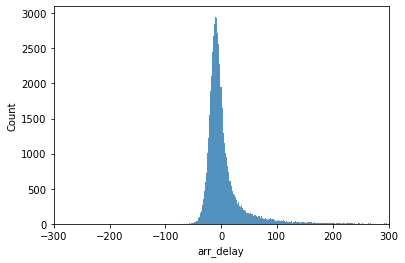

In [45]:
sns.histplot(arr_delay)
plt.xlim(-300, 300)

In [ ]:
#pretty normal distribution, skewed to the right as expected (delays can be much longer than arriving so much earlier than expected)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [48]:
import datetime as dt
sample3['fl_date'] = pd.to_datetime(sample3['fl_date'])
sample3['fl_date']

0       2019-12-29
1       2018-03-30
2       2019-02-24
3       2019-07-16
4       2019-03-23
           ...    
99995   2018-11-05
99996   2018-01-18
99997   2018-10-31
99998   2018-08-29
99999   2018-02-10
Name: fl_date, Length: 100000, dtype: datetime64[ns]

In [49]:
sample3['month'] = sample3['fl_date'].dt.month
monthly_count = sample3.groupby(['month'])['arr_delay'].count()
monthly_count = pd.DataFrame(monthly_count)
monthly_count

,arr_delay
month,
1,7583
2,7143
3,8297
4,8169
5,8508
6,8350
7,8620
8,8696
9,8107


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

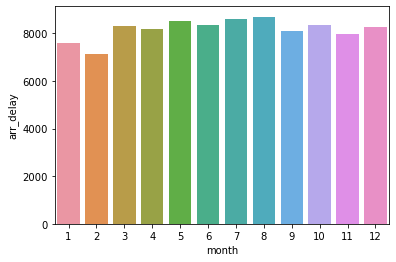

In [50]:
sns.barplot(x= monthly_count.index,y=monthly_count['arr_delay'])

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [74]:
sample3['dep_delay'].mean(), sample3['dep_delay'].count()

(10.72854644542053, 98352)

In [66]:
sample3['arr_delay'].mean()

5.668849783218566

In [77]:
task5_count = 0
for i in sample3['dep_delay']:
    if i > 0:
        task5_count += 1

In [79]:
task5_count/sample3['dep_delay'].count()

0.34109118269074346

#### **Task 6**: How many states cover 50% of US air traffic? 

In [80]:
sample3[['city', 'country']] = sample3['origin_city_name'].str.split(',', expand=True, n=2)

In [84]:
sample3['country'].unique()

array([' OR', ' MI', ' CO', ' AK', ' VA', ' CA', ' NV', ' GA', ' NC',
       ' NY', ' IL', ' TX', ' FL', ' MA', ' PA', ' TN', ' MT', ' DC',
       ' MO', ' LA', ' HI', ' NH', ' NE', ' OK', ' IN', ' VT', ' OH',
       ' NJ', ' WA', ' RI', ' MD', ' UT', ' WI', ' AL', ' AZ', ' IA',
       ' ND', ' SC', ' MN', ' ID', ' PR', ' ME', ' NM', ' CT', ' VI',
       ' MS', ' KY', ' KS', ' AR', ' WY', ' SD', ' WV', ' TT'],
      dtype=object)

In [86]:
sample3.groupby(['country'])['country'].count()

country
 AK      524
 AL      509
 AR      439
 AZ     2528
 CA    11110
 CO     3928
 CT      392
 DC     2954
 FL     7148
 GA     5338
 HI     1557
 IA      399
 ID      412
 IL     6348
 IN      891
 KS      220
 KY      476
 LA     1077
 MA     1944
 MD     1354
 ME      273
 MI     2842
 MN     2096
 MO     1840
 MS      180
 MT      369
 NC     4711
 ND      255
 NE      403
 NH      177
 NJ     2140
 NM      421
 NV     2369
 NY     5197
 OH     2298
 OK      566
 OR     1402
 PA     2935
 PR      348
 RI      234
 SC      845
 SD      187
 TN     1760
 TT       22
 TX     9982
 UT     1484
 VA     1017
 VI       59
 VT      131
 WA     2829
 WI      854
 WV       97
 WY      129
Name: country, dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [107]:
sample3['avg_velocity'] = sample3['distance']/sample3['air_time']*60
sample3['avg_velocity']

0        414.857143
1        360.000000
2        541.077844
3        502.196532
4        296.000000
            ...    
99995    465.945946
99996    387.368421
99997    445.384615
99998    379.746835
99999           NaN
Name: avg_velocity, Length: 100000, dtype: float64

In [165]:
#finding the avg_velocity of planes with departure delays
avg_v = []
avg_v_no_delay =[]
for i, item in enumerate(sample3['dep_delay']):
    if item > 0:
        avg_v.append(sample3['avg_velocity'][i])
    else:
        avg_v_no_delay.append(sample3['avg_velocity'][i])

In [177]:
#avg MPH of planes with departure delays
x=pd.DataFrame(avg_v)
x.mean()

0    404.956251
dtype: float64

In [178]:
#avg MPH of planes with no departure delays
xx=pd.DataFrame(avg_v_no_delay)
xx.mean()

0    395.961574
dtype: float64

<AxesSubplot:ylabel='Count'>

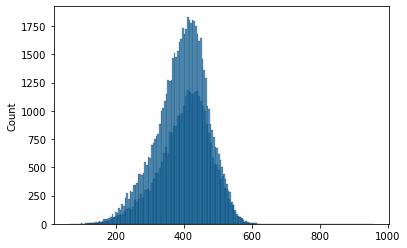

In [174]:
sns.histplot(avg_v)
sns.histplot(avg_v_no_delay)

In [175]:
#as we can see in the above that delays do impact the average velocity by a small amount ~10 MPH

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [179]:
sample3['origin'].value_counts().head(15)

ATL    5018
ORD    4923
DFW    3756
DEN    3491
CLT    3183
LAX    3145
SEA    2298
SFO    2291
LGA    2225
DTW    2224
PHX    2183
IAH    2165
LAS    2106
EWR    2062
MSP    1978
Name: origin, dtype: int64

In [170]:
passengers[['passengers','origin']].groupby(['origin'])['passengers'].sum().sort_values(ascending=False).head(15)

origin
ATL    11180013.0
LAX     8955650.0
ORD     8909799.0
DFW     6726975.0
JFK     6481029.0
DEN     6208689.0
SFO     5401938.0
LAS     5115134.0
SEA     4946960.0
PHX     4858320.0
EWR     4721763.0
CLT     4625696.0
MCO     4428447.0
IAH     4411454.0
MIA     4385738.0
Name: passengers, dtype: float64

In [ ]:
#We see that there is correlation between # of flights are indeed correlated with number of passengers, although there is some exceptions

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?